In [3]:
import os
import time
import datetime
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling as pdp
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

In [4]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

train = train.rename(columns={'賃料': 'target', '契約期間': 'Contract', '間取り': 'Room',
                              '築年数': 'Passed', '駐車場': 'Parking', '室内設備': 'Facility',
                              '放送・通信': 'Internet', '周辺環境': 'Building', '建物構造': 'Material',
                              '面積': 'Area', 'キッチン': 'Kitchen', '所在地': 'Place',
                              'バス・トイレ': 'Bath', '所在階': 'Floor', 'アクセス': 'Access',
                              '方角': 'Angle'})
test = test.rename(columns={'契約期間': 'Contract', '間取り': 'Room', '築年数': 'Passed',
                            '駐車場': 'Parking', '室内設備': 'Facility', '放送・通信': 'Internet',
                            '周辺環境': 'Building', '建物構造': 'Material', '面積': 'Area',
                            'キッチン': 'Kitchen', '所在地': 'Place', 'バス・トイレ': 'Bath',
                            '所在階': 'Floor', 'アクセス': 'Access', '方角': 'Angle'})

In [5]:
train.head(2)

,id,target,Place,Access,Room,Passed,Angle,Area,Floor,Bath,Kitchen,Internet,Facility,Parking,Building,Material,Contract
0,1,75000,東京都北区滝野川３丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1K,9年9ヶ月,南東,20.01m2,1階／12階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC（鉄筋コンクリート）,2年間
1,2,76000,東京都中央区月島３丁目,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,1R,44年10ヶ月,NaN,16.5m2,5階／10階建,専用トイレ／\tシャワー／\t温水洗浄便座,ガスコンロ／\tシステムキッチン\t／\t給湯,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 1283m,鉄骨造,2年間


In [6]:
place = train["Place"].str.replace("東京都", "").str.split("区")
place = pd.DataFrame(place.str, index=["Place", "Place2"]).T
# japanse_ward = ['世田谷', '中央', '中野', '北', '千代田', '台東', '品川', '墨田', '大田', '文京',
#                 '新宿', '杉並', '板橋', '江戸川', '江東', '渋谷', '港', '目黒', '練馬', '荒川',
#                 '葛飾', '豊島', '足立']

# english_ward = ["Setagaya", 'Cyuo', 'Nakano', 'Kita', 'Tiyoda', 'Daito', 'Sinagawa', 'Sumida', 'Ota', 'Bunkyo',                          'Sinzyuku', 'Suginami', 'Itabashi', 'Edogawa', 'Eto', 'Shibuya', 'Minato', 'Meguro', 'Nerima', 'Arakawa',                'Katushika', 'Toyoshima', 'Adati']
# for j, e in zip(japanse_ward, english_ward):
#     place["Place"].str.replace(j, e)
place["Place"] = place["Place"].replace({'世田谷': 'Setagaya', '中央': 'Cyuo', '中野': 'Nakano', '北': 'Kita',
                                         '千代田': 'Tiyoda', '台東': 'Daito', '品川': 'Sinagawa', '墨田': 'Sumida',
                                         '大田': 'Ota', '文京': 'Bunkyo', '新宿': 'Sinzyuku', '杉並': 'Suginami',
                                         '板橋': 'Itabshi', '江戸川': 'Edogawa', '江東': 'Eto', '渋谷': 'Shibuya',
                                         '港': 'Minato', '目黒': 'Meguro', '練馬': 'Nerima', '荒川': 'Arakawa',
                                         '葛飾': 'Katushika', '豊島': 'Toyoshima', '足立': 'Adati'})

In [33]:
area = train["Area"].str.replace('m2', '').astype(float).round()
area = pd.DataFrame(area)
area["target_per_area"] = train["target"] / area["Area"]
area["target"]

,Area,target_per_area
0,20.0,3750.000000
1,16.0,4750.000000
2,22.0,5000.000000
3,60.0,2500.000000
4,40.0,1850.000000
...,...,...
31465,38.0,2105.263158
31466,12.0,4541.666667
31467,60.0,2083.333333
31468,30.0,3266.666667


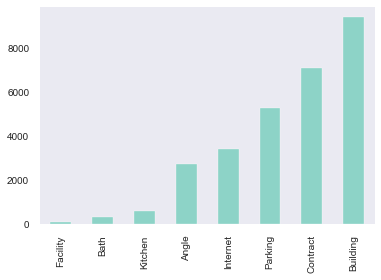

In [14]:
# 訓練データの欠損値の可視化
sns.set_style("dark")
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

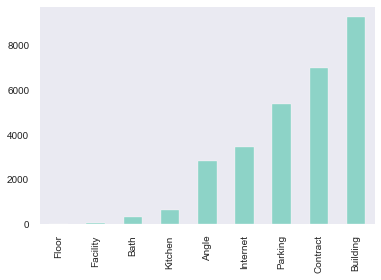

In [15]:
# テストデータの欠損値の可視化
missing = test.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

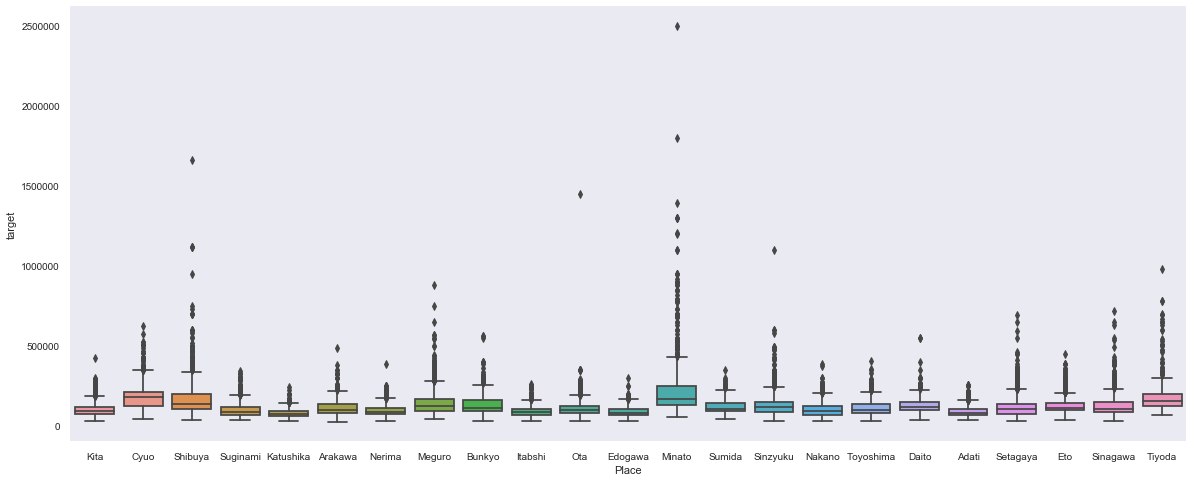

In [42]:
data = pd.concat([train['target'], place["Place"]], axis=1)
fig = plt.figure(figsize=(20, 8))
sns.set_style("dark")
ax = sns.boxplot(x="Place", y="target", data=data)
# ax.set_ylim(ymin=0, ymax=500000)
plt.show()

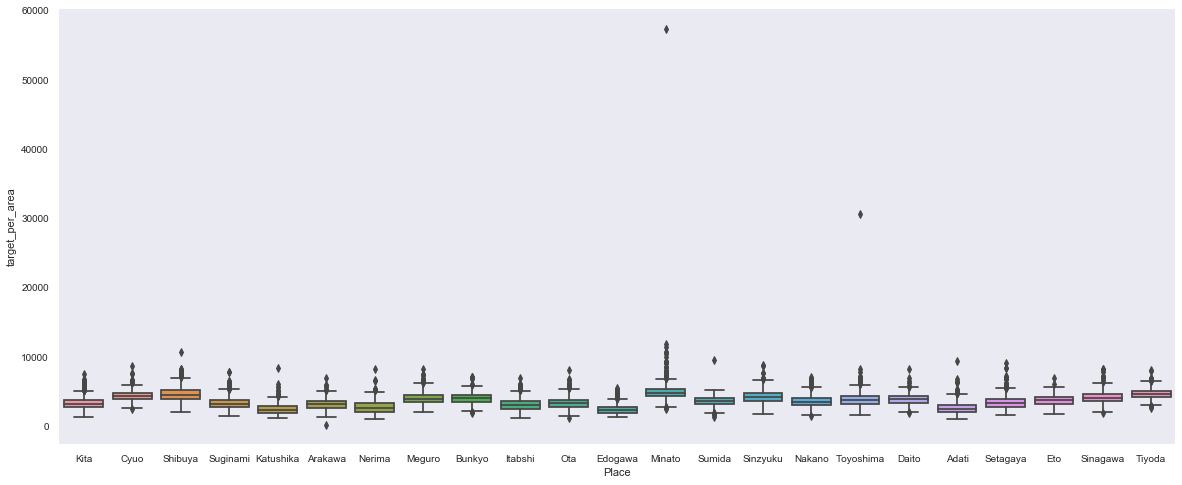

In [38]:
data["target_per_area"] = area["target_per_area"]
fig = plt.figure(figsize=(20, 8))
sns.set_style("dark")
ax = sns.boxplot(x="Place", y="target_per_area", data=data)
ax.set_ylim(ymin=0, ymax=10000)
plt.show()

In [48]:
train[train["target"] > 1000000]

,id,target,Place,Access,Room,Passed,Angle,Area,Floor,Bath,Kitchen,Internet,Facility,Parking,Building,Material,Contract
1501,1502,1200000,東京都港区元麻布３丁目,南北線\t麻布十番駅\t徒歩9分\t\t都営大江戸線\t六本木駅\t徒歩9分\t\t東京メト...,3LDK,18年6ヶ月,南東,163.62m2,3階／3階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,ガスコンロ／\tシステムキッチン\t／\t給湯,光ファイバー／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...,"駐車場\t空有\t57,000円(税込)",NaN,RC（鉄筋コンクリート）,5年間\t※この物件は\t定期借家\tです。
1771,1772,1450000,東京都大田区田園調布３丁目,東急東横線\t田園調布駅\t徒歩5分\t\t東急目黒線\t田園調布駅\t徒歩5分,4LDK+S(納戸),9年1ヶ月,南西,232.01m2,2階建,専用バス／\t専用トイレ／\tシャワー／\t温水洗浄便座／\t洗面台独立,ガスコンロ／\tシステムキッチン\t／\t給湯,光ファイバー／\tCATV,エアコン付\tウォークインクローゼット\tフローリング／\t室内洗濯機置場,駐車場\t空有,NaN,木造,4年間\t※この物件は\t定期借家\tです。
5093,5094,2500000,東京都港区三田２丁目4-3,南北線\t麻布十番駅\t徒歩8分\t\t都営大江戸線\t赤羽橋駅\t徒歩9分\t\t山手線\...,2LDK+S(納戸),1年8ヶ月,西,217.29m2,9階／9階建（地下2階）,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,IHコンロ\t／\tコンロ3口／\tシステムキッチン\t／\tカウンターキッチン\t／\tL...,インターネット対応,エアコン付／\t床暖房\tウォークインクローゼット\tシューズボックス／\tバルコニー／\t...,"駐車場\t空有(43台)\t48,600円",【飲食店】 959m\t【飲食店】 611m\t【スーパー】 417m\t【スーパー】 65...,RC（鉄筋コンクリート）,3年間\t※この物件は\t定期借家\tです。
5775,5776,1203500,東京都港区新橋４丁目,山手線\t新橋駅\t徒歩2分\t\t都営大江戸線\t汐留駅\t徒歩2分,1K,12年5ヶ月,北西,20.53m2,10階／15階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\t光ファイバー／\tCATV／\tインターネット使用料無料,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 432m\t【スーパー】 570m\t【コンビニ】 43m\t【コンビニ】 2...,RC（鉄筋コンクリート）,2年間
8706,8707,1390000,東京都港区虎ノ門５丁目11-1,日比谷線\t神谷町駅\t徒歩1分\t\t南北線\t六本木一丁目駅\t徒歩10分\t\t都営三...,2LDK,14年10ヶ月,東,138.99m2,7階／24階建,専用バス／\t専用トイレ／\tシャワー／\t追焚機能／\t浴室乾燥機\t／\t温水洗浄便座／...,ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\t給湯／\t独立キッチン,インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tトランクルーム\t／\tウォークインクローゼット\tバルコニー／\t24時間換...,"駐車場\t空有\t54,000円(税込)\t駐輪場\t空有\tバイク置き場\t無",【スーパー】 558m\t【スーパー】 535m\t【コンビニ】 330m\t【コンビニ】 ...,鉄骨造,3年間\t※この物件は\t定期借家\tです。
9008,9009,1300000,東京都港区麻布台３丁目4-24,都営大江戸線\t麻布十番駅\t徒歩7分\t\t南北線\t六本木一丁目駅\t徒歩8分\t\t日...,3LDK+S(納戸),30年5ヶ月,南,223.71m2,3階建,専用バス／\t専用トイレ／\tバス・トイレ別／\t追焚機能／\t浴室乾燥機\t／\t洗面台独...,ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\tL字キッチン,NaN,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...,駐車場\t空有\t0円\t駐輪場\t空有\tバイク置き場\t空有,【スーパー】 538m\t【コンビニ】 390m\t【コンビニ】 454m\t【スーパー】 ...,木造,3年間\t※この物件は\t定期借家\tです。
11367,11368,1100000,東京都新宿区新宿６丁目,都営大江戸線\t東新宿駅\t徒歩2分\t\t都営新宿線\t新宿三丁目駅\t徒歩10分\t\t...,2LDK,25年1ヶ月,南東,192.43m2,9階／10階建（地下1階）,バス・トイレ別／\tシャワー／\t追焚機能／\t温水洗浄便座／\t洗面台独立／\t脱衣所,ガスコンロ／\tコンロ3口／\t給湯,インターネット対応／\t光ファイバー,エアコン付\tロフト付き／\tバルコニー／\tフローリング／\t2面採光／\t室内洗濯機置場...,"駐車場\t空有\t43,200円",【スーパー】 170m\t【スーパー】 502m\t【コンビニ】 14m\t【コンビニ】 1...,SRC（鉄骨鉄筋コンクリート）,2年間
11958,11959,1120000,東京都渋谷区広尾１丁目,山手線\t恵比寿駅\t徒歩6分\t\t日比谷線\t広尾駅\t徒歩13分\t\t東急東横線\t...,4LDK,22年7ヶ月,南,221.3m2,11階／13階建,専用バス／\t専用トイレ／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座／\t洗面台独立...,ガスコンロ／\tコンロ4口以上／\tシステムキッチン\t／\t給湯／\t独立キッチン,インターネット対応／\t光ファイバー／\tCATV,エアコン付\tトランクルーム\t／\tウォークインクローゼット\tシューズボックス／\tバル...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 729m\t【コンビニ】 177m\t【スーパー】 363m\t【病院】 727m,RC（鉄筋コンクリート）,3年間\t※この物件は\t定期借家\tです。
15417,15418,1300000,東京都港区南麻布１丁目16-2,南北線\t麻布十番駅\t徒歩7分\t\t南北線\t白金高輪駅\t徒歩16分\t\t都営大江戸...,2LDK,5年1ヶ月,北,125m2,7階／7階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\t給湯／\t独立キッチン／\tL字キッチン,インターネット対応／\t光ファイバー,エアコン付\tウォークインクローゼット\tシューズボックス／\tロフト付き／\tバルコニー／...,"駐車場\t空有\t54,000円(税込)\t駐輪場\t空有\tバイク置き場\t無",【スーパー】 217m\t【スーパー】 541m\t【コンビニ】 256m\t【コンビニ】 ...,RC（鉄筋コンクリート）,2年間\t※この物件は\t定期借家\tです。
16847,16848,1120000,東京都渋谷区広尾１丁目1-7,山手線\t恵比寿駅\t徒歩6分\t\t日比谷線\t広尾駅\t徒歩14分\t\t東急東横線\t...,4LDK,22年7ヶ月,東,221.3m2,11階／13階建（地下2階）,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t温水洗浄便座／...,コンロ4口以上／\tシステムキッチン\t／\t給湯,光ファイバー／\tCATV,冷房／\tエアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気...,"駐車場\t空有\t64,800円\t(※サイズ・空き要確認)",【デパート】 964m\t【スーパー】 752m\t【スーパー】 989m\t【スーパー】 ...,RC（鉄筋コンクリート）,3年間\t※この物件は\t定期借家\tです。


In [53]:
data["N_room"] = train["Room"].str[0].astype(int)  # strの１文字目（部屋数）を取得
data["Area_per_nroom"] = area["Area"] / data["N_room"]
temp_room = train["Room"].str[1:].replace("R", "")
data["L_room"] = temp_room.str.contains("L") * 1
data["D_room"] = temp_room.str.contains("D") * 1
data["K_room"] = temp_room.str.contains("K") * 1
data["S_room"] = temp_room.str.contains("S") * 1
data["N_room2"] = data["N_room"] + data["L_room"] + data["D_room"] + data["K_room"] + data["S_room"]
data["Area_per_nroom2"] = area["Area"] / data["N_room2"]

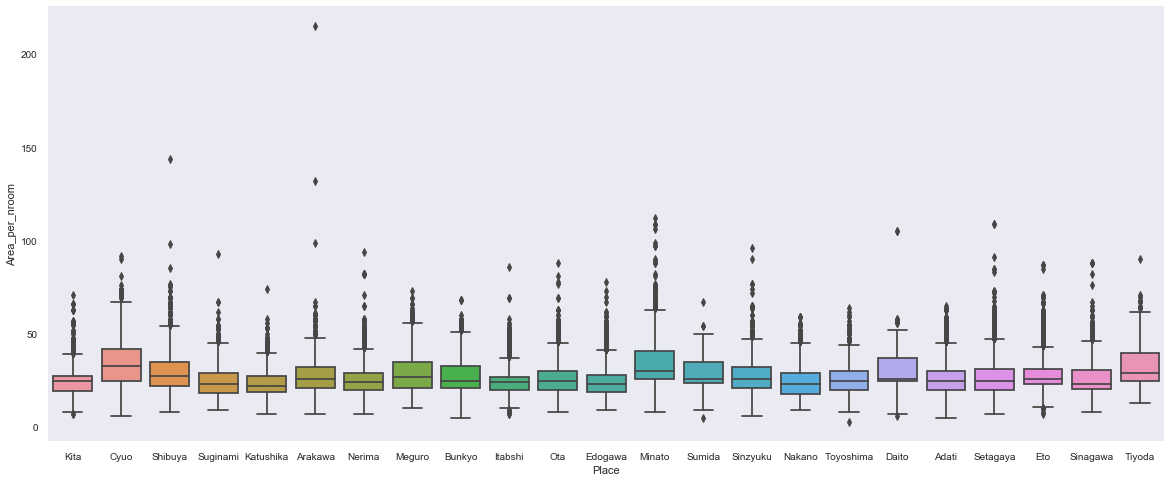

In [56]:
fig = plt.figure(figsize=(20, 8))
sns.set_style("dark")
ax = sns.boxplot(x="Place", y="Area_per_nroom2", data=data)
# ax.set_ylim(ymin=0, ymax=10000)
plt.show()

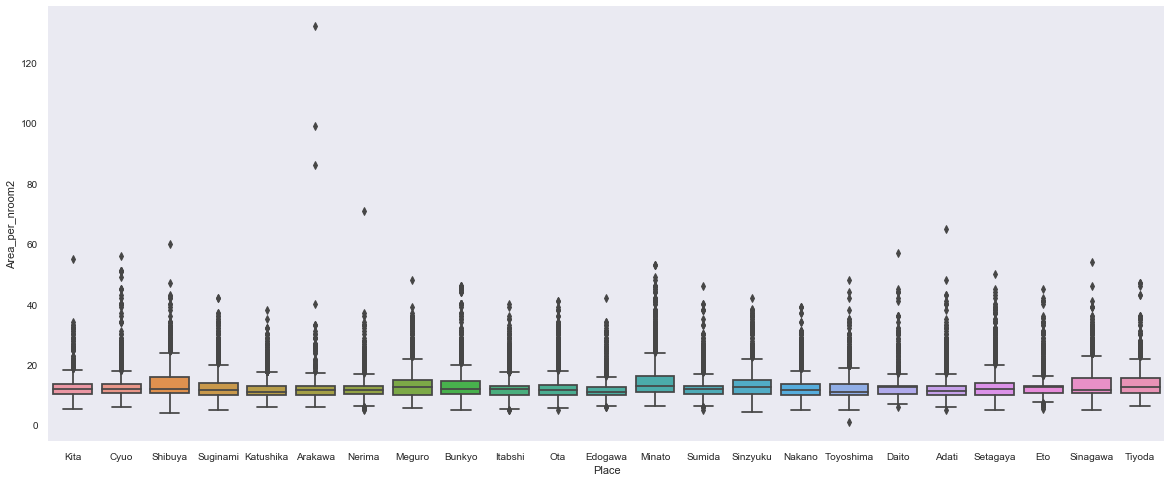

In [55]:
fig = plt.figure(figsize=(20, 8))
sns.set_style("dark")
ax = sns.boxplot(x="Place", y="Area_per_nroom2", data=data)
# ax.set_ylim(ymin=0, ymax=10000)
plt.show()

In [ ]:
data["target_per_area"] = area["target_per_area"]
passed = df["Passed"].str.replace("新築", "0年").str.split("年", expand=True)
data["Passed"] = passed[0].astype(int)
fig = plt.figure(figsize=(20, 8))
sns.set_style("dark")
sns.distplot(data)
# ax = sns.boxplot(x="Place", y="target_per_area", data=data)
ax.set_ylim(ymin=0, ymax=10000)
plt.show()